# Plot ROH bar figures of the Caribbean Data

In [1]:
import numpy as np
import os  # For Saving to Folder
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colorbar as clb
import matplotlib.colors as cls
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
#from mpl_toolkits.basemap import Basemap

import socket
import os as os
import sys as sys
import multiprocessing as mp

### For Arial Font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
rcParams['font.sans-serif'] = ['Arial']  # Make sure to have the font installed (it is on cluster for Harald)

### To do lowess smoothing
#import statsmodels.api as sm
#lowess = sm.nonparametric.lowess

socket_name = socket.gethostname()
print(socket_name)
if socket_name == "VioletQueen":
    path = "/home/harald/git/HAPSBURG/"   # The Path on Harald's machine
elif socket_name.startswith("midway2"):
    print("Midway jnovmbre partition detected.")
    path = "/project2/jnovembre/hringbauer/HAPSBURG/"  # The Path on Midway Cluster
elif socket_name.startswith("Harald-Laptop"):
    print("Midway jnovmbre partition detected.")
    path = "/home/hringbauer/git/HAPSBURG/"  # The Path on Midway Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd()) # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(f"CPU Count: {mp.cpu_count()}")

sys.path.append("./package/") # Append Hapsburg Folder
#from PackagesSupport.roh_expectations import Expected_Roh
from hapsburg.figures.plot_bars import prepare_dfs_plot, plot_panel_row

midway2-0402.rcc.local
Midway jnovmbre partition detected.
/project2/jnovembre/hringbauer/HAPSBURG
CPU Count: 28


Saved figure to ./figures_test/Carib/roh_final_set_bar.pdf


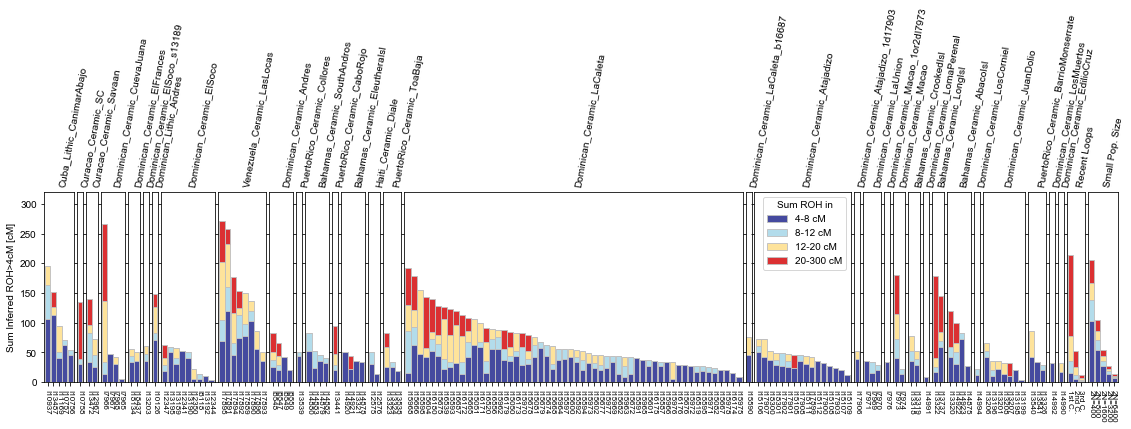

In [3]:
df1 = pd.read_csv("./Empirical/Eigenstrat/Sirak20/combined_roh05.csv", sep='\t')
plot_dfs, cols = prepare_dfs_plot(df1, cms=[4, 8, 12, 20])

plot_panel_row(plot_dfs, savepath="./figures_test/Carib/roh_final_set_bar.pdf", 
               wspace=0.1, r_title=80, leg_pos=-14, 
               ylim=[0,320], figsize=(len(df1)/8, 3.5))

In [5]:
len(df1)

154

Saved figure to ./figures_test/Carib/all_bars_dom1.pdf


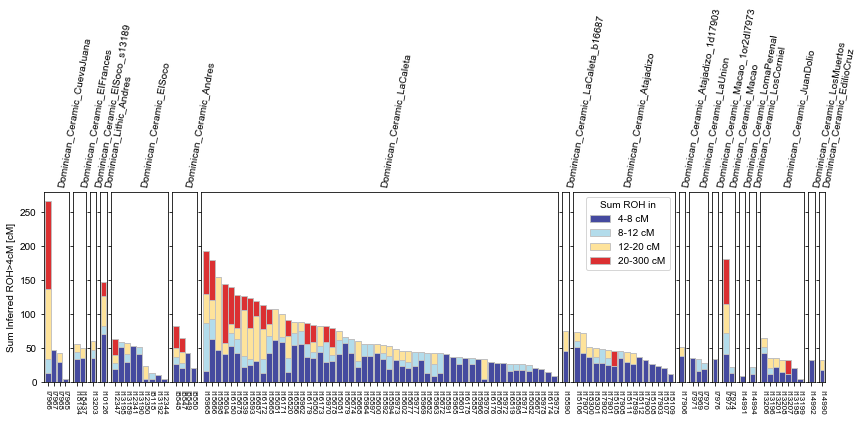

Saved figure to ./figures_test/Carib/all_bars_nondom1.pdf


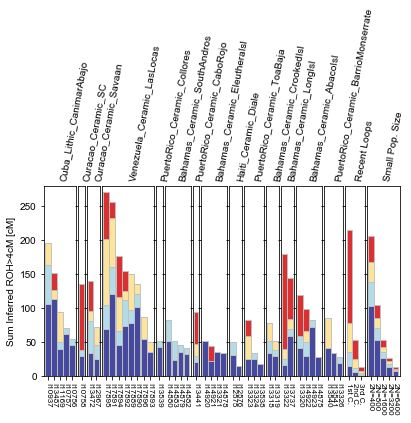

In [26]:
df1 = pd.read_csv("./Empirical/Eigenstrat/Sirak20/combined_roh05.csv", sep='\t')
plot_dfs, cols = prepare_dfs_plot(df1, cms=[4, 8, 12, 20])


### Pull out Dominican
#dom_idx = ["Dominican" in df["pop"].values[0] for df in plot_dfs]
plot_dfs1 = [df for df in plot_dfs if ("Dominican" in df["pop"].values[0])]
plot_dfs2 = [df for df in plot_dfs if ("Dominican" not in df["pop"].values[0])]

l1 = np.sum([len(df) for df in plot_dfs1])
l2 = np.sum([len(df) for df in plot_dfs2]) + 9

plot_panel_row(plot_dfs1[:], savepath="./figures_test/Carib/all_bars_dom1.pdf", 
               wspace=0.1, r_title=80, leg_pos=-10,
               ylim=[0, 280], figsize=(l1/8, 3.5), legends=False)

plot_panel_row(plot_dfs2[:], savepath="./figures_test/Carib/all_bars_nondom1.pdf", 
               wspace=0.1, r_title=80, leg_pos=-20,
               ylim=[0, 280], figsize=(l2/8, 3.5), legends=True)

# Plot only the Cuban ones

Saved figure to ./figures_test/Carib/roh_cuban_bar.pdf


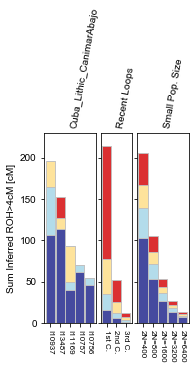

In [24]:
df1 = pd.read_csv("./Empirical/Eigenstrat/Sirak20/combined_roh05.csv", sep='\t')
df2 = df1[df1["clst"].str.contains("Cuba")].copy()
plot_dfs, cols = prepare_dfs_plot(df2, cms=[4, 8, 12, 20])

plot_panel_row(plot_dfs, savepath="./figures_test/Carib/roh_cuban_bar.pdf", 
               wspace=0.1, r_title=80, leg_pos=-14, 
               ylim=[0,230], figsize=((len(df2)+8)/5, 3.5))

In [28]:
df2.sort_values(by="age")

iid                       pop    max_roh   sum_roh>4  n_roh>4  \
67  I10756  Cuba_Lithic_CanimarAbajo   8.663797   54.565703       10   
31  I11169  Cuba_Lithic_CanimarAbajo  18.753999   93.771202       12   
11  I13487  Cuba_Lithic_CanimarAbajo  25.732401  152.469417       22   
52  I10757  Cuba_Lithic_CanimarAbajo   8.214600   70.513299       14   
3   I10937  Cuba_Lithic_CanimarAbajo  19.245398  195.531078       28   

    sum_roh>8  n_roh>8  sum_roh>12  n_roh>12  sum_roh>20     ...       \
67   8.663797        1    0.000000         0    0.000000     ...        
31  53.293002        4   43.730003         3    0.000000     ...        
11  39.033607        2   39.033607         2   25.732401     ...        
52   8.214600        1    0.000000         0    0.000000     ...        
3   89.078182        8   31.484496         2    0.000000     ...        

          lat        lon   age                                   age_range  \
67  23.038894 -81.495252   868    1016-1148 calCE (980±15 BP, PSUAMS-5340)   
31  23.038894 -81.495252  1322     605-651 calCE (1425±15 BP, PSUAMS-4868)   
11  23.038894 -81.495252  2050                          1400 BCE - 1200 CE   
52  23.038894 -81.495252  2050  1210-1028 calBCE (2920±25 BP, PSUAMS-7453)   
3   23.038894 -81.495252  3046  1187-1004 calBCE (2890±20 BP, PSUAMS-4864)   

      study                      clst        clst1  mean_cov n_cov_snp  \
67  Sirak20  Cuba_Lithic_CanimarAbajo  Cuba_Lithic  0.623518    748222   
31  Sirak20  Cuba_Lithic_CanimarAbajo  Cuba_Lithic  0.621566    745879   
11  Sirak20  Cuba_Lithic_CanimarAbajo  Cuba_Lithic  0.442270    530724   
52  Sirak20  Cuba_Lithic_CanimarAbajo  Cuba_Lithic  0.613718    736461   
3   Sirak20  Cuba_Lithic_CanimarAbajo  Cuba_Lithic  0.622512    747014   

    include_alt  
67            1  
31            1  
11            1  
52            1  
3             1  

[5 rows x 22 columns]

# Plot all of them

In [ ]:
### Extract all for one Region
df1 = pd.read_csv("./Empirical/Eigenstrat/Sirak20/combined_roh05.csv", sep='\t')
pops = ["Cuba", "Venezuela", "Dominican", "Bahamas", "Curacao", "PuertoRico", "Haiti"]
save_path_base = "./figures_test/Carib/"

for p in pops:
    df_t = df1[df1["pop"].str.contains(p)].copy()
    print(df_t.sort_values(by="age", ascending=False)[["iid","pop","age", "sum_roh>20"]])
    savepath = os.path.join(save_path_base, str(p) + ".pdf")
    plot_dfs, cols = prepare_dfs_plot(df_t, cms=[4, 8, 12, 20])
    plot_panel_row(plot_dfs, savepath=savepath, 
                   wspace=0.1, r_title=80, leg_pos=0, 
                   ylim=[0,250], figsize=((len(df_t)+8)/4, 3.5))